# problem 2

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

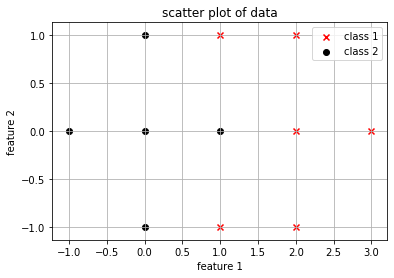

In [19]:
x = np.array([[1,-1] , [2,-1],[2,0],[3,0],[1,1],[2,1]])
x = x.T
o = np.array([[-1,0],[0,-1],[0,0],[0,1],[1,0]])
o = o.T
plt.scatter(x[0,:],x[1,:] , color = 'red' , marker = 'x' , label = 'class 1')
plt.scatter(o[0,:],o[1,:] , color = 'black' , marker = 'o' , label = 'class 2')
plt.grid()
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('scatter plot of data')
plt.legend()

In [31]:
def uniform(x , y , h):
    if (abs(x[0]-y[0])<= h and abs(x[1]-y[1])<= h ) :
        return 1/(h**2)
    return 0
def parzen_estimate (data , window , points , h , visual=True) :
    ''' designed for 2D data to estimate density function'''
    print(data.shape)
    data_size = data.shape[1]
    max_1 = data[0,:].max()
    min_1 = data[0,:].min()
    
    max_2 = data[1,:].max()
    min_2 = data[1,:].min()
    
    x = np.linspace(min_1 , max_1 , points)
    y = np.linspace(min_2 , max_2 , points)
    
    X , Y = np.meshgrid(x , y) 
    z = np.vstack((X.flatten() , Y.flatten()))
    estimate = np.zeros(z.shape[1])
    for i in range(z.shape[1]):
        for j in range(data_size):
            estimate[i] += window(z[:,i] , data[:,j] , h)
    estimate = estimate / data_size
    estimate = estimate.reshape(X.shape)
    
    if visual :
        fig = plt.figure()
        ax = plt.axes(projection = '3d')
        ax.plot_surface(X,Y,estimate, cmap = 'winter' , label = 'first')
    return estimate

(2, 6)
(2, 5)


array([[0. , 0. , 0. , 0.8, 0.8, 0.8, 0.8, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.8, 0.8, 0.8, 0.8, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.8, 0.8, 0.8, 0.8, 0. , 0. , 0. ],
       [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8],
       [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8],
       [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8],
       [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8],
       [0. , 0. , 0. , 0.8, 0.8, 0.8, 0.8, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.8, 0.8, 0.8, 0.8, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.8, 0.8, 0.8, 0.8, 0. , 0. , 0. ]])

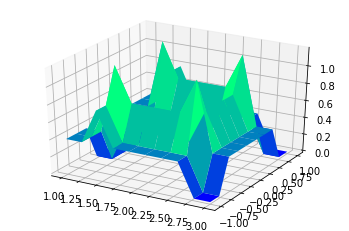

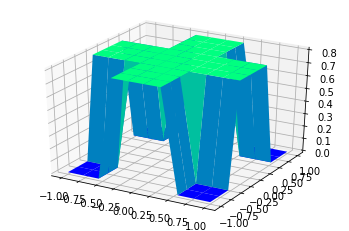

In [57]:
parzen_estimate(x,uniform,10 , 0.65)
parzen_estimate(o,uniform,10 , 0.5)

In [58]:
def Euclidean(x, y):
    return ((x[0]-y[0])**2 + (x[1]-y[1])**2)**0.5

def  City_Block(x,y):
    return max(abs(x[0]-y[0]),abs(x[1]-y[1]))

def knn_estimate(data ,points ,distance,k=3,visual=True):
    ''' designed for 2D data to estimate density function'''
    print(data.shape)
    data_size = data.shape[1]
    max_1 = data[0,:].max()
    min_1 = data[0,:].min()
    
    max_2 = data[1,:].max()
    min_2 = data[1,:].min()
    
    x = np.linspace(min_1 , max_1 , points)
    y = np.linspace(min_2 , max_2 , points)
    
    X , Y = np.meshgrid(x , y) 
    z = np.vstack((X.flatten() , Y.flatten()))
    estimate = np.zeros(z.shape[1])
    for i in range(z.shape[1]):
        dist = np.zeros(data_size)
        for j in range(data_size):
            dist[j] = distance(z[:,i] , data[:,j])
        dist.sort()
        diag= dist[k]
        estimate[i] = (k**(-1))/data_size/diag**2/2
    
    estimate = estimate.reshape(X.shape)
    
    if visual :
        fig = plt.figure()
        ax = plt.axes(projection = '3d')
        ax.plot_surface(X,Y,estimate, cmap = 'winter' , label = 'first')
    return estimate
    
    

(2, 6)
(2, 6)


array([[0.00694444, 0.00878906, 0.01147959, 0.015625  , 0.0225    ,
        0.0225    , 0.015625  , 0.01147959, 0.00878906, 0.00694444],
       [0.00878906, 0.00878906, 0.01147959, 0.015625  , 0.0225    ,
        0.0225    , 0.015625  , 0.01147959, 0.00878906, 0.00878906],
       [0.01147959, 0.01147959, 0.01147959, 0.015625  , 0.0225    ,
        0.0225    , 0.015625  , 0.01147959, 0.01147959, 0.01147959],
       [0.015625  , 0.015625  , 0.015625  , 0.015625  , 0.0225    ,
        0.0225    , 0.015625  , 0.015625  , 0.015625  , 0.015625  ],
       [0.0225    , 0.0225    , 0.0225    , 0.0225    , 0.0225    ,
        0.0225    , 0.0225    , 0.0225    , 0.0225    , 0.0225    ],
       [0.0225    , 0.0225    , 0.0225    , 0.0225    , 0.0225    ,
        0.0225    , 0.0225    , 0.0225    , 0.0225    , 0.0225    ],
       [0.015625  , 0.015625  , 0.015625  , 0.015625  , 0.0225    ,
        0.0225    , 0.015625  , 0.015625  , 0.015625  , 0.015625  ],
       [0.01147959, 0.01147959, 0.0114795

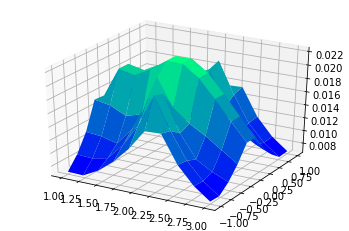

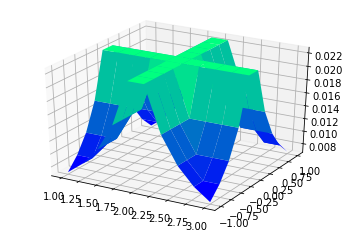

In [59]:
knn_estimate(x ,10, Euclidean)
knn_estimate(x,10, City_Block)